In [2]:
%run ../../utils/commonImports.py
%matplotlib inline

ERROR:root:File `'../utils/commonImports.py'` not found.


# Prediction on validation set

Calc confusion matrix stats...


### Precision - recall

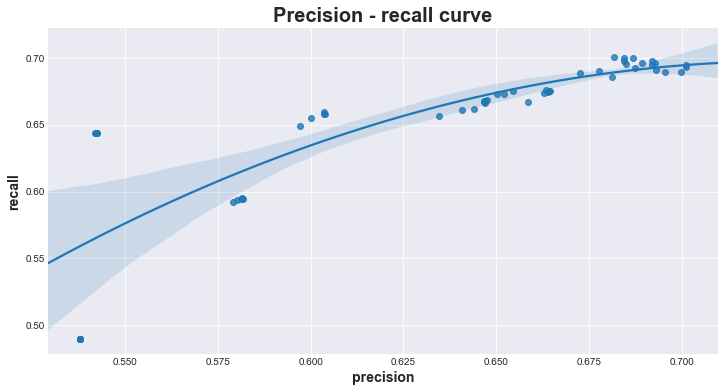

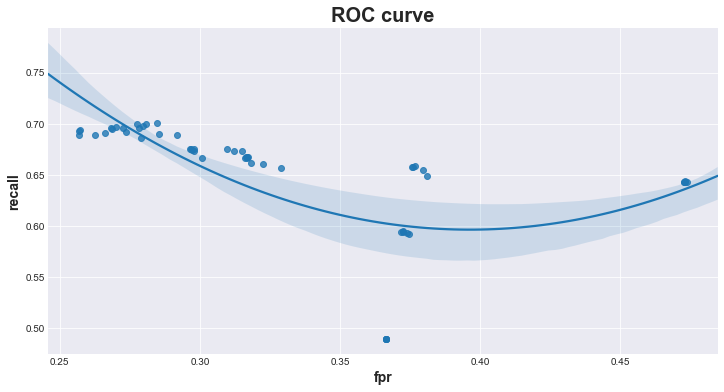

        predicted_0  predicted_1
true_0        11800         4082
true_1         4293         9521

Precison: 0.700
Recall: 0.689
FPR: 0.257
        predicted_0  predicted_1
true_0        16987         6079
true_1         6038        13319

Precison: 0.687
Recall: 0.688
FPR: 0.264


In [4]:
data_root = "D:\\Dropbox\\My work\\krypl-project\\dataSplit\\01-priceMovement"
gs_path = "D:\\Dropbox\\My work\\krypl-project\\models\\01-priceMovement\\tree_search.pkl"
%run ../model-evaluation.ipynb